## Лабораторная работа по курсу "Искусственный интеллект"

## Многослойный персептрон
|Студент| Анисимов Валерий |
|:-----:|:-:|
|Группа|М8О-408Б-18|
|Вариант| 3 (1) |
|Фреймворк| PyTorch |


### Настройка среды

In [1]:
%pip install pandas
%pip install numpy
%pip install torch
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'1.9.1+cpu'

Введем некоторые функции для анализа датасетов

In [3]:
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Кол-во элементов в классе")
    plt.xlabel("Номер каждого класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Количество элементов в датасете : {}".format(len(labels)))
    print("Количество атрибутов в элементе : {}".format(len(features[0])))
    print("Минимальное значение атрибута   : {}".format(np.min(features)))
    print("Максимальное значение атрибута  : {}".format(np.max(features)))
    print()

### Поготовка датасетов

Тестировать нейронные сети на основе фреймворка PyTorch будем на датасетах MNIST, FashionMNIST, CIFAR-10.
#### MNIST

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

Данные для [MNIST]
Количество элементов в датасете : 42000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Обучающая выборка из MNIST]
Количество элементов в датасете : 33600
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Данные для [Тестировочная выборка из MNIST]
Количество элементов в датасете : 8400
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0



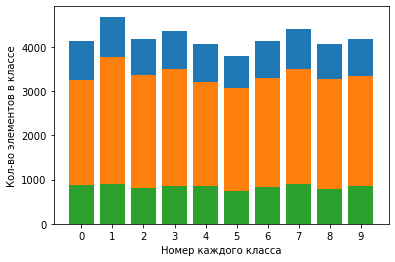

In [5]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

#### FashionMNIST

In [6]:
%cd fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y=mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y  =mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

C:\Users\anisi\Desktop\fashion-mnist\utils
C:\Users\anisi\Desktop\fashion-mnist
C:\Users\anisi\Desktop


Данные для [Обучающая выборка из Fashion MNIST]
Количество элементов в датасете : 60000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка из Fashion MNIST]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



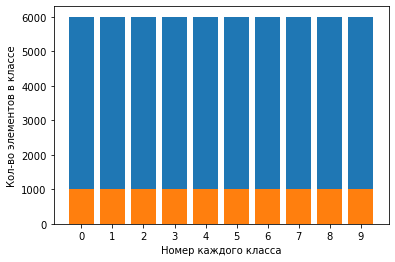

In [7]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из Fashion MNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из Fashion MNIST")

In [8]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

#### CIFAR-10

In [9]:
def unpickle_cifar(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
test_batch = unpickle_cifar('cifar-10-batches-py/test_batch')
data_batch_1 = unpickle_cifar('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle_cifar('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle_cifar('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle_cifar('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle_cifar('cifar-10-batches-py/data_batch_5')

In [10]:
print(test_batch.keys())
print(data_batch_1.keys())
print(test_batch[b'labels'])
print(test_batch[b'data'])
print(test_batch[b'data'][0])
print(len(test_batch[b'data'][0]))

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2,

In [11]:
print("Кол-во элементов в test_batch   : {}".format(len(test_batch[b'labels'])))
print("Кол-во элементов в data_batch_1 : {}".format(len(data_batch_1[b'labels'])))
print("Кол-во элементов в data_batch_2 : {}".format(len(data_batch_2[b'labels'])))
print("Кол-во элементов в data_batch_3 : {}".format(len(data_batch_3[b'labels'])))
print("Кол-во элементов в data_batch_4 : {}".format(len(data_batch_4[b'labels'])))
print("Кол-во элементов в data_batch_5 : {}".format(len(data_batch_5[b'labels'])))

Кол-во элементов в test_batch   : 10000
Кол-во элементов в data_batch_1 : 10000
Кол-во элементов в data_batch_2 : 10000
Кол-во элементов в data_batch_3 : 10000
Кол-во элементов в data_batch_4 : 10000
Кол-во элементов в data_batch_5 : 10000


In [12]:
def append_list_to_list(list1, list2):
    for value in list2:
        list1.append(value)

cifar_train_x_raw = []
cifar_train_y     = []

append_list_to_list(cifar_train_x_raw, data_batch_1[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_2[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_3[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_4[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_5[b'data'])

append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])

cifar_test_x_raw = test_batch[b'data']
cifar_test_y     = test_batch[b'labels']

Данные для [Обчающая выборка CIFAR-10]
Количество элементов в датасете : 50000
Количество атрибутов в элементе : 3072
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка CIFAR-10]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 3072
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



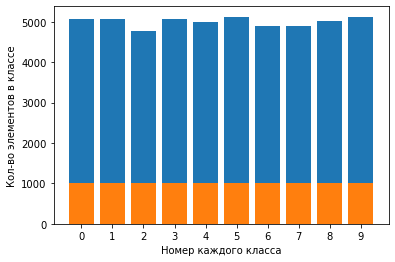

In [13]:
analyze(cifar_train_y, cifar_train_x_raw, "Обчающая выборка CIFAR-10")
analyze(cifar_test_y, cifar_test_x_raw, "Тестировочная выборка CIFAR-10")

Данные для [Тестовая выборка CIFAR-10]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 1024
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Размер тестовой выборки  : 10000
Размер обучающей выборки : 50000
Размер датасета CIFAR-10 : 60000


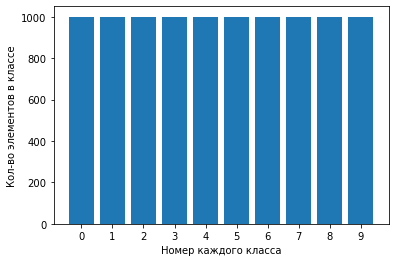

In [14]:
def conv_cifar(X):
    df = np.array(X).astype(np.float32)
    result = np.zeros(len(df) * len(df[0])//3, dtype=np.float32)
    i = 0
    for v in df:
        #print(v)
        #print(len(v))
        for j in range(0, len(v), 3):
            #print(j)
            result[i] = (v[j] + v[j+1] + v[j+2])/765
            i += 1
    return np.reshape(result ,(len(df), len(df[0])//3))


cifar_test_x  = conv_cifar(cifar_test_x_raw)
cifar_train_x = conv_cifar(cifar_train_x_raw)
analyze(cifar_test_y,cifar_test_x,"Тестовая выборка CIFAR-10")
print('Размер тестовой выборки  : {}'.format(len(cifar_test_x)))
print('Размер обучающей выборки : {}'.format(len(cifar_train_x)))
print('Размер датасета CIFAR-10 : {}'.format(len(cifar_test_x) + len(cifar_train_x)))

### Перцептрон на PyTorch

In [15]:
class PyTorchPerceptron(torch.nn.Module):
    def __init__(self, layers=[10], func=torch.nn.Sigmoid(), 
                 loss_func=torch.nn.functional.binary_cross_entropy_with_logits, 
                 epochs=10,show_status=False, learning_rate=0.05):
        super().__init__()
        self.layers=layers
        self.func=func
        self.epochs=epochs
        self.show_status=show_status
        self.learning_rate=learning_rate
        self.level=0
        self.loss_function=loss_func
    
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
        
    def fit(self, X, Y):
        self.create_net(X,Y)
        
        if self.show_status:
            self.level = 0
            self.status_print("Обучение сети:")
            self.level += 1
        
        self.train(X,Y)
        return self
        
    def create_net(self, X,Y):
        self.level=0
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        module_layers = []
        
        if self.show_status:
            self.status_print("Создание сети :")
            self.level += 1
            self.status_print("Количество скрытых слоев     : {}".format(len(layers_settings)-2))
            self.status_print("Количество входных нейронов  : {}".format(layers_settings[0]))
            self.status_print("Koличество выходных нейронов : {}".format(layers_settings[-1]))
            self.status_print("Широты скрытых слоев         : {}".format(self.layers))
            self.level -= 1
        
        for i in range(len(layers_settings)-2):
            module_layers.append(torch.nn.Linear(layers_settings[i], layers_settings[i+1]))
            module_layers.append(self.func)
            
        module_layers.append(torch.nn.Linear(layers_settings[-2], layers_settings[-1]))
        #module_layers.append(torch.nn.Softmax)
        self.net = torch.nn.Sequential(*module_layers)
        return self    

    def train(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        val_y = []
        for y in Y:
            val = np.zeros(self.classes_count)
            for i in range(10):
                val[i] = 1 if i == y else 0
            val_y.append(val.copy().astype(np.float32))
        dataset = torch.utils.data.TensorDataset(val_x,torch.tensor(val_y,dtype=torch.float32))
        dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)
        optim = torch.optim.Adam(self.net.parameters(),lr=self.learning_rate)
        for epoch in range(1, self.epochs+1):
            for (x,y) in dataloader:
                z = self.net(x)
                loss = self.loss_function(z,y)
                optim.zero_grad()
                loss.backward()
                optim.step()
            acc = self.score(X,Y)
            if self.show_status:
                self.status_print("[Эпоха {} из {}] потеря : {}, точность : {}".format(epoch, self.epochs,loss,acc))
                
    def score(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        total_success = 0
        for res, y in zip(results, Y):
            if res == y:
                total_success += 1
        acc = total_success / len(Y)
        return acc
    def confusion_matrix(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
        for res, y in zip(results, Y):
            matrix[res][y] += 1
        return matrix
        

### Тестирование MNIST
#### Однослойные перцептроны

Sigmoid, количество внутренних слоев : 0

In [16]:
first_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[])
first_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.2383759319782257, точность : 0.8828571428571429
  [Эпоха 2 из 10] потеря : 0.22040116786956787, точность : 0.8873511904761905
  [Эпоха 3 из 10] потеря : 0.1957322657108307, точность : 0.8869940476190477
  [Эпоха 4 из 10] потеря : 0.25307419896125793, точность : 0.8782738095238095
  [Эпоха 5 из 10] потеря : 0.24931415915489197, точность : 0.8869940476190477
  [Эпоха 6 из 10] потеря : 0.2119695395231247, точность : 0.8820833333333333
  [Эпоха 7 из 10] потеря : 0.2150215357542038, точность : 0.890327380952381
  [Эпоха 8 из 10] потеря : 0.2392100840806961, точность : 0.8891964285714286
  [Эпоха 9 из 10] потеря : 0.2590774893760681, точность : 0.8910119047619047
  [Эпоха 10 из 10] потеря : 0.23720583319664001, точность : 0.887827380952381
Точность сети : 0.8620238095238095


ReLU, количество внутренних слоев : 0

In [17]:
second_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.ReLU())
second_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.21996033191680908, точность : 0.8423809523809523
  [Эпоха 2 из 10] потеря : 0.22081811726093292, точность : 0.845
  [Эпоха 3 из 10] потеря : 0.20652182400226593, точность : 0.8425595238095238
  [Эпоха 4 из 10] потеря : 0.21296873688697815, точность : 0.8327678571428572
  [Эпоха 5 из 10] потеря : 0.2494426667690277, точность : 0.8336607142857143
  [Эпоха 6 из 10] потеря : 0.21631450951099396, точность : 0.8385714285714285
  [Эпоха 7 из 10] потеря : 0.24163790047168732, точность : 0.8394940476190477
  [Эпоха 8 из 10] потеря : 0.20877322554588318, точность : 0.8403571428571428
  [Эпоха 9 из 10] потеря : 0.22273996472358704, точность : 0.8501488095238096
  [Эпоха 10 из 10] потеря : 0.20384666323661804, точность : 0.8482440476190476
Точность сети : 0.8258333333333333


Tanh, количество внутренних слоев : 0

In [18]:
third_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Tanh())
third_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.23352324962615967, точность : 0.8817559523809524
  [Эпоха 2 из 10] потеря : 0.21639983355998993, точность : 0.8870238095238095
  [Эпоха 3 из 10] потеря : 0.18762199580669403, точность : 0.8838690476190476
  [Эпоха 4 из 10] потеря : 0.22149816155433655, точность : 0.8850892857142857
  [Эпоха 5 из 10] потеря : 0.24156033992767334, точность : 0.8834821428571429
  [Эпоха 6 из 10] потеря : 0.2781367897987366, точность : 0.8865773809523809
  [Эпоха 7 из 10] потеря : 0.23581655323505402, точность : 0.8794047619047619
  [Эпоха 8 из 10] потеря : 0.20979523658752441, точность : 0.8813392857142858
  [Эпоха 9 из 10] потеря : 0.21278803050518036, точность : 0.8858928571428571
  [Эпоха 10 из 10] потеря : 0.1918928474187851, точность : 0.8862797619047619
Точность сети : 0.8614285714285714


#### Двуслойные перцептроны

Tanh, количество внутренних слоев : 1, широты : 15

In [19]:
first_one_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[15], func=torch.nn.Tanh())
first_one_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_one_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.15706053376197815, точность : 0.5555654761904761
  [Эпоха 2 из 10] потеря : 0.11933968961238861, точность : 0.7589285714285714
  [Эпоха 3 из 10] потеря : 0.12582819163799286, точность : 0.7677083333333333
  [Эпоха 4 из 10] потеря : 0.162873312830925, точность : 0.7654166666666666
  [Эпоха 5 из 10] потеря : 0.19717423617839813, точность : 0.7570833333333333
  [Эпоха 6 из 10] потеря : 0.14621469378471375, точность : 0.7652380952380953
  [Эпоха 7 из 10] потеря : 0.18432410061359406, точность : 0.7733928571428571
  [Эпоха 8 из 10] потеря : 0.11662255227565765, точность : 0.7993154761904762
  [Эпоха 9 из 10] потеря : 0.15035425126552582, точность : 0.8108333333333333
  [Эпоха 10 из 10] потеря : 0.07553385943174362, точность : 0.79
Точность сети : 0.7758333333333334


Tanh, количество внутренних слоев : 1, широты : 30

In [20]:
second_one_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[30], func=torch.nn.Tanh())
second_one_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_one_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.08829618990421295, точность : 0.7254761904761905
  [Эпоха 2 из 10] потеря : 0.10101880878210068, точность : 0.7187202380952381
  [Эпоха 3 из 10] потеря : 0.10681011527776718, точность : 0.7724107142857143
  [Эпоха 4 из 10] потеря : 0.11161629110574722, точность : 0.7750892857142857
  [Эпоха 5 из 10] потеря : 0.09768121689558029, точность : 0.7824702380952381
  [Эпоха 6 из 10] потеря : 0.08351396024227142, точность : 0.783720238095238
  [Эпоха 7 из 10] потеря : 0.06428272277116776, точность : 0.8017559523809524
  [Эпоха 8 из 10] потеря : 0.09586071968078613, точность : 0.7897619047619048
  [Эпоха 9 из 10] потеря : 0.05608725547790527, точность : 0.8344345238095238
  [Эпоха 10 из 10] потеря : 0.05616425350308418, точность : 0.8429464285714285
Точность сети : 0.8316666666666667


Sigmoid, количество внутренних слоев : 1, широты : 30

In [21]:
third_one_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[30])
third_one_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_one_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.144229456782341, точность : 0.8401488095238095
  [Эпоха 2 из 10] потеря : 0.0867149606347084, точность : 0.8709523809523809
  [Эпоха 3 из 10] потеря : 0.1114036813378334, точность : 0.8583035714285714
  [Эпоха 4 из 10] потеря : 0.08135467767715454, точность : 0.8684226190476191
  [Эпоха 5 из 10] потеря : 0.07998746633529663, точность : 0.8564583333333333
  [Эпоха 6 из 10] потеря : 0.08965352922677994, точность : 0.8924702380952381
  [Эпоха 7 из 10] потеря : 0.10324522107839584, точность : 0.882529761904762
  [Эпоха 8 из 10] потеря : 0.07777225971221924, точность : 0.887797619047619
  [Эпоха 9 из 10] потеря : 0.07637614011764526, точность : 0.893154761904762
  [Эпоха 10 из 10] потеря : 0.07823812961578369, точность : 0.9064285714285715
Точность сети : 0.8978571428571429


#### Трехслойные перцептроны

Tanh, количество внутренних слоев : 2, широты : 20, 15

In [24]:
first_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15])
first_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.21789446473121643, точность : 0.4429464285714286
  [Эпоха 2 из 10] потеря : 0.23484082520008087, точность : 0.44142857142857145
  [Эпоха 3 из 10] потеря : 0.2401113510131836, точность : 0.42854166666666665
  [Эпоха 4 из 10] потеря : 0.20589759945869446, точность : 0.45422619047619045
  [Эпоха 5 из 10] потеря : 0.15484680235385895, точность : 0.6750892857142857
  [Эпоха 6 из 10] потеря : 0.19603069126605988, точность : 0.7441071428571429
  [Эпоха 7 из 10] потеря : 0.11731342226266861, точность : 0.8297321428571428
  [Эпоха 8 из 10] потеря : 0.08169644325971603, точность : 0.8439880952380953
  [Эпоха 9 из 10] потеря : 0.12276892364025116, точность : 0.8148809523809524
  [Эпоха 10 из 10] потеря : 0.10333050787448883, точность : 0.8520238095238095
Точность сети : 0.8463095238095238


Sigmoid, количество внутренних слоев : 2, широты : 20, 15

In [23]:
second_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15])
second_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.21435371041297913, точность : 0.40767857142857145
  [Эпоха 2 из 10] потеря : 0.17967960238456726, точность : 0.43794642857142857
  [Эпоха 3 из 10] потеря : 0.19117364287376404, точность : 0.532172619047619
  [Эпоха 4 из 10] потеря : 0.2089114487171173, точность : 0.5276190476190477
  [Эпоха 5 из 10] потеря : 0.1753236949443817, точность : 0.5311607142857143
  [Эпоха 6 из 10] потеря : 0.17818686366081238, точность : 0.5441666666666667
  [Эпоха 7 из 10] потеря : 0.17018625140190125, точность : 0.5411309523809524
  [Эпоха 8 из 10] потеря : 0.16926194727420807, точность : 0.6498511904761904
  [Эпоха 9 из 10] потеря : 0.13824941217899323, точность : 0.6566071428571428
  [Эпоха 10 из 10] потеря : 0.16385287046432495, точность : 0.680625
Точность сети : 0.6765476190476191


ELU, количество внутренних слоев : 2, широты : 20, 15

In [25]:
third_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15], func=torch.nn.ELU())
third_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.10609463602304459, точность : 0.7252678571428571
  [Эпоха 2 из 10] потеря : 0.15853984653949738, точность : 0.6185119047619048
  [Эпоха 3 из 10] потеря : 0.11357484757900238, точность : 0.4438392857142857
  [Эпоха 4 из 10] потеря : 0.11962778866291046, точность : 0.477827380952381
  [Эпоха 5 из 10] потеря : 0.14208582043647766, точность : 0.540327380952381
  [Эпоха 6 из 10] потеря : 0.13886265456676483, точность : 0.5158333333333334
  [Эпоха 7 из 10] потеря : 0.14183661341667175, точность : 0.5267559523809524
  [Эпоха 8 из 10] потеря : 0.10814683139324188, точность : 0.5322619047619047
  [Эпоха 9 из 10] потеря : 0.13295774161815643, точность : 0.5398809523809524
  [Эпоха 10 из 10] потеря : 0.12973904609680176, точность : 0.5226190476190476
Точность сети : 0.5126190476190476


Softsign, количество внутренних слоев : 2, широты : 20, 15

In [26]:
fourth_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15], func=torch.nn.Softsign())
fourth_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(fourth_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.16302064061164856, точность : 0.7744940476190476
  [Эпоха 2 из 10] потеря : 0.1142144650220871, точность : 0.8548809523809524
  [Эпоха 3 из 10] потеря : 0.10631050169467926, точность : 0.8438392857142857
  [Эпоха 4 из 10] потеря : 0.05773870274424553, точность : 0.8826190476190476
  [Эпоха 5 из 10] потеря : 0.11607290804386139, точность : 0.8348511904761905
  [Эпоха 6 из 10] потеря : 0.06618493050336838, точность : 0.8946726190476191
  [Эпоха 7 из 10] потеря : 0.1086476594209671, точность : 0.8838095238095238
  [Эпоха 8 из 10] потеря : 0.14232394099235535, точность : 0.8862797619047619
  [Эпоха 9 из 10] потеря : 0.10459534078836441, точность : 0.8950297619047619
  [Эпоха 10 из 10] потеря : 0.07384650409221649, точность : 0.8946428571428572
Точность сети : 0.8879761904761905


### Тестирование FashionMNIST
#### Однослойные перцептроны
Softsign, количество внутренних слоев : 0

In [27]:
first_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Softsign(), learning_rate = 0.001, epochs=25)
first_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(first_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 25] потеря : 0.09112871438264847, точность : 0.82965
  [Эпоха 2 из 25] потеря : 0.08312006294727325, точность : 0.8422
  [Эпоха 3 из 25] потеря : 0.07922971993684769, точность : 0.8475
  [Эпоха 4 из 25] потеря : 0.0768524706363678, точность : 0.85035
  [Эпоха 5 из 25] потеря : 0.07522393763065338, точность : 0.8524333333333334
  [Эпоха 6 из 25] потеря : 0.07401680201292038, точность : 0.8539
  [Эпоха 7 из 25] потеря : 0.0730716735124588, точность : 0.8557166666666667
  [Эпоха 8 из 25] потеря : 0.07230310142040253, точность : 0.8567333333333333
  [Эпоха 9 из 25] потеря : 0.07166094332933426, точность : 0.8574333333333334
  [Эпоха 10 из 25] потеря : 0.07111363112926483, точность : 0.8584333333333334
  [Эпоха 11 из 25] потеря : 0.07063998281955719, точность : 0.8591166666666666
  [Эпоха 12 из 25] потеря

Sigmoid, количество внутренних слоев : 0

In [28]:
second_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], learning_rate = 0.001, epochs=20)
second_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.09118814021348953, точность : 0.8302666666666667
  [Эпоха 2 из 20] потеря : 0.08311693370342255, точность : 0.8418666666666667
  [Эпоха 3 из 20] потеря : 0.07918856292963028, точность : 0.8475166666666667
  [Эпоха 4 из 20] потеря : 0.07679074257612228, точность : 0.8506
  [Эпоха 5 из 20] потеря : 0.07514937967061996, точность : 0.85265
  [Эпоха 6 из 20] потеря : 0.07393307983875275, точность : 0.85395
  [Эпоха 7 из 20] потеря : 0.07298077642917633, точность : 0.8554
  [Эпоха 8 из 20] потеря : 0.07220648229122162, точность : 0.8566833333333334
  [Эпоха 9 из 20] потеря : 0.07155980169773102, точность : 0.8576166666666667
  [Эпоха 10 из 20] потеря : 0.07100891321897507, точность : 0.8585333333333334
  [Эпоха 11 из 20] потеря : 0.07053254544734955, точность : 0.8591166666666666
  [Эпоха 12

Tanh, количество внутренних слоев : 0

In [29]:
second_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Tanh(), learning_rate=0.001)
second_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.09100563824176788, точность : 0.83005
  [Эпоха 2 из 10] потеря : 0.08311007916927338, точность : 0.8418833333333333
  [Эпоха 3 из 10] потеря : 0.0792088583111763, точность : 0.8475666666666667
  [Эпоха 4 из 10] потеря : 0.07680904120206833, точность : 0.8505333333333334
  [Эпоха 5 из 10] потеря : 0.07516007125377655, точность : 0.8523666666666667
  [Эпоха 6 из 10] потеря : 0.07393546402454376, точность : 0.854
  [Эпоха 7 из 10] потеря : 0.07297541946172714, точность : 0.8555666666666667
  [Эпоха 8 из 10] потеря : 0.07219419628381729, точность : 0.8568666666666667
  [Эпоха 9 из 10] потеря : 0.07154137641191483, точность : 0.8574333333333334
  [Эпоха 10 из 10] потеря : 0.07098519802093506, точность : 0.8582333333333333
Точность сети : 0.8369


#### Двуслойные перцептроны
Sigmoid, количество внутренних слоев : 1, широты : 20

In [30]:
first_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[20], epochs=10, learning_rate=0.001)
first_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(first_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.09274433553218842, точность : 0.8132333333333334
  [Эпоха 2 из 10] потеря : 0.07139384001493454, точность : 0.8482333333333333
  [Эпоха 3 из 10] потеря : 0.06452915072441101, точность : 0.8586833333333334
  [Эпоха 4 из 10] потеря : 0.059293169528245926, точность : 0.8656833333333334
  [Эпоха 5 из 10] потеря : 0.054702866822481155, точность : 0.8698333333333333
  [Эпоха 6 из 10] потеря : 0.0513717345893383, точность : 0.8732333333333333
  [Эпоха 7 из 10] потеря : 0.0488932728767395, точность : 0.8754833333333333
  [Эпоха 8 из 10] потеря : 0.046681247651576996, точность : 0.8774833333333333
  [Эпоха 9 из 10] потеря : 0.044605083763599396, точность : 0.8795166666666666
  [Эпоха 10 из 10] потеря : 0.042834438383579254, точность : 0.8809166666666667
Точность сети : 0.8565


Sigmoid, количество внутренних слоев : 1, широты : 40

In [31]:
second_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[40], learning_rate=0.001, epochs=10)
second_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [40]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.07449835538864136, точность : 0.84055
  [Эпоха 2 из 10] потеря : 0.05558536574244499, точность : 0.8604166666666667
  [Эпоха 3 из 10] потеря : 0.04772006720304489, точность : 0.8684833333333334
  [Эпоха 4 из 10] потеря : 0.0424964465200901, точность : 0.8745666666666667
  [Эпоха 5 из 10] потеря : 0.03898771479725838, точность : 0.8793
  [Эпоха 6 из 10] потеря : 0.03597339987754822, точность : 0.883
  [Эпоха 7 из 10] потеря : 0.033892568200826645, точность : 0.8865
  [Эпоха 8 из 10] потеря : 0.03203059732913971, точность : 0.88945
  [Эпоха 9 из 10] потеря : 0.03023558482527733, точность : 0.8917666666666667
  [Эпоха 10 из 10] потеря : 0.028784388676285744, точность : 0.894
Точность сети : 0.8691


ReLU, количество внутренних слоев : 1, широты : 40

In [32]:
third_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[40], learning_rate=0.001, epochs=10, func=torch.nn.ReLU())
third_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(third_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [40]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.07455678284168243, точность : 0.808
  [Эпоха 2 из 10] потеря : 0.05721697211265564, точность : 0.83715
  [Эпоха 3 из 10] потеря : 0.04825632646679878, точность : 0.8490166666666666
  [Эпоха 4 из 10] потеря : 0.04000701755285263, точность : 0.8581333333333333
  [Эпоха 5 из 10] потеря : 0.03818025812506676, точность : 0.8629666666666667
  [Эпоха 6 из 10] потеря : 0.039237670600414276, точность : 0.8671833333333333
  [Эпоха 7 из 10] потеря : 0.03610638529062271, точность : 0.8689833333333333
  [Эпоха 8 из 10] потеря : 0.034124039113521576, точность : 0.8705
  [Эпоха 9 из 10] потеря : 0.03207800164818764, точность : 0.87245
  [Эпоха 10 из 10] потеря : 0.029619863256812096, точность : 0.8763
Точность сети : 0.8475


### Тестирование CIFAR-10

Tanh, количество внутренних слоев : 1, широты : 1000

In [33]:
first_null_cf_perceptron = PyTorchPerceptron(show_status=True, layers=[1000], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
first_null_cf_perceptron.fit(cifar_train_x, cifar_train_y)

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 1024
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [1000]
Обучение сети:
  [Эпоха 1 из 50] потеря : 0.34457749128341675, точность : 0.13818
  [Эпоха 2 из 50] потеря : 0.3439987599849701, точность : 0.14344
  [Эпоха 3 из 50] потеря : 0.34210819005966187, точность : 0.14754
  [Эпоха 4 из 50] потеря : 0.33908718824386597, точность : 0.14996
  [Эпоха 5 из 50] потеря : 0.3371235728263855, точность : 0.1524
  [Эпоха 6 из 50] потеря : 0.33411726355552673, точность : 0.15484
  [Эпоха 7 из 50] потеря : 0.3316207528114319, точность : 0.1571
  [Эпоха 8 из 50] потеря : 0.3305515944957733, точность : 0.15816
  [Эпоха 9 из 50] потеря : 0.32947131991386414, точность : 0.15952
  [Эпоха 10 из 50] потеря : 0.32858699560165405, точность : 0.16086
  [Эпоха 11 из 50] потеря : 0.3277924656867981, точность : 0.16262
  [Эпоха 12 из 50] потеря : 0.326975554227829, точность : 0.16338
  [Эпоха 13 из 50] пот

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=1024, out_features=1000, bias=True)
    (1): Tanh()
    (2): Linear(in_features=1000, out_features=10, bias=True)
  )
)

In [34]:
print("Точность сети : {}".format(first_null_cf_perceptron.score(cifar_test_x, cifar_test_y)))
print("Confusion matrix :")
print(first_null_cf_perceptron.confusion_matrix(cifar_test_x, cifar_test_y))

Точность сети : 0.4385
Confusion matrix :
[[354  11  60  18  38  14   1  12  30  15]
 [ 42 507  38  46  26  23  25  32  66 130]
 [ 39   8 212  44  87  50  37  23   7   7]
 [ 36  43 145 409  97 287 168  86  39  52]
 [ 20  14  82  25 267  48  62  44  12   6]
 [ 11  14  48 119  39 231  41  27  12  10]
 [ 34  42 163 113 176 107 544  47  15  37]
 [103  58 161 119 203 154  69 618  41  77]
 [302 113  59  43  46  58  16  38 701 124]
 [ 59 190  32  64  21  28  37  73  77 542]]


Tanh, количество внутренних слоев : 0

In [35]:
second_null_cf_perceptron = PyTorchPerceptron(show_status=True, layers=[], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
second_null_cf_perceptron.fit(cifar_train_x, cifar_train_y)

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 1024
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 50] потеря : 0.328010231256485, точность : 0.12888
  [Эпоха 2 из 50] потеря : 0.3283363878726959, точность : 0.13386
  [Эпоха 3 из 50] потеря : 0.32839450240135193, точность : 0.13776
  [Эпоха 4 из 50] потеря : 0.328264057636261, точность : 0.14006
  [Эпоха 5 из 50] потеря : 0.32805174589157104, точность : 0.14192
  [Эпоха 6 из 50] потеря : 0.3278072476387024, точность : 0.14324
  [Эпоха 7 из 50] потеря : 0.3275516629219055, точность : 0.14436
  [Эпоха 8 из 50] потеря : 0.3272940218448639, точность : 0.1448
  [Эпоха 9 из 50] потеря : 0.32703855633735657, точность : 0.14556
  [Эпоха 10 из 50] потеря : 0.3267872929573059, точность : 0.14602
  [Эпоха 11 из 50] потеря : 0.3265414535999298, точность : 0.14694
  [Эпоха 12 из 50] потеря : 0.3263014853000641, точность : 0.14764
  [Эпоха 13 из 50] потеря : 0

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [36]:
print("Точность сети : {}".format(second_null_cf_perceptron.score(cifar_test_x, cifar_test_y)))
print("Confusion matrix :")
print(second_null_cf_perceptron.confusion_matrix(cifar_test_x, cifar_test_y))

Точность сети : 0.3037
Confusion matrix :
[[244  29  70  33  43  18  14  34  43  34]
 [ 59 393  55  71  52  43  70  54  78 142]
 [  2   1  15   8  11   3   9   4   0   1]
 [137  93 278 348 288 281 344 161  72  59]
 [  2   0  17   3  45   4  10  13   0   1]
 [ 48  64 160 274 156 381 170 147  58  39]
 [ 11  21  90  38 120  26 212  21   2  25]
 [ 48  47 114  54 153  98  62 315  11  40]
 [387 212 160  97  93 106  64 109 659 234]
 [ 62 140  41  74  39  40  45 142  77 425]]


### Выводы

#### Итоги тестирования

Приведем итоговую таблицу тестрования нейросетей различной конфигурации для различных датасетов. (Лучшие нейросети выделены жирным шрифтом)

| № | Кол-во слоев | Широты | Фун-я активации | Скорость обучения | Кол-во эпох | Тестовая точность (%) | Датасет |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1| 1| 784| Sigmoid| 0.05| 10| 86.202| MNIST|
| 2| 1| 784| ReLU| 0.05| 10| 82.583| MNIST |
|**3**| **1**| **784**| **Tanh**| **0.05**| **10**| **86.143**| **MNIST** |
| 4| 2| 784-15| Tanh| 0.05| 10| 77.583| MNIST |
| 5| 2| 784-30| Tanh| 0.05| 10| 83.167| MNIST |
| **6**| **2**| **784-30**| **Sigmoid**| **0.05**| **10**| **89.786**| **MNIST**|
| 7| 3| 784-20-15| Tanh| 0.05| 10| 84.631| MNIST |
| 8| 3| 784-20-15| Sigmoid| 0.05| 10| 67.655| MNIST |
| 9| 3| 784-20-15| ELU| 0.05| 10| 51.262| MNIST |
| **10**| **3**| **784-20-15**| **Softsign**| **0.05**| **10**| **88.798**| **MNIST** |
| **11**| **1**| **784** | **Softsign**| **0.001**| **25**| **83.93**| **FashionMNIST** |
| 12| 1| 784 | Sigmoid | 0.001| 20| 83.93| FashionMNIST |
| 13| 1| 784 | Tanh | 0.001| 10| 83.69| FashionMNIST |
| 14| 2| 784-20 | Sigmoid | 0.001| 10| 85.65| FashionMNIST |
| **15**| **2**| **784-40** | **Sigmoid** | **0.001**| **10**| **86.91**| **FashionMNIST** |
| 16| 2| 784-40 | ReLU | 0.001| 10| 84.75| FashionMNIST |
| 17| 2| 1024-1000| Tanh | 0.0001| 50| 43.85| CIFAR-10|
| 18| 1| 1024 | Tanh | 0.0001| 50| 30.37| CIFAR-10|

Confusion maxtrix для наиболее успешных нейросетей.

In [37]:
print('Confusion matrix MNIST')
print(third_null_layered_perceptron.confusion_matrix(mnist_test_x, mnist_test_y))
print()
print('Confusion matrix FashionMNIST')
print(second_one_layred_fm_perceptron.confusion_matrix(fashion_mnist_test_x, fashion_mnist_test_y))

Confusion matrix MNIST
[[787   0   9   3   6   3   7  11  10   4]
 [  0 877  14   0  10   4   0   4  25   5]
 [ 45  12 735  71  48  32  45  42 100  26]
 [  5   2   9 708   6  56   0   5  38  38]
 [  0   0   5   3 763   7   6  12   3  41]
 [ 19   4   1  41   3 585  19   5  20  15]
 [  6   2   9   2   8   5 745   2   7   1]
 [  1   3   7   5   0   2   1 787   4  32]
 [  6   4  10  17   6  30   7   0 569   8]
 [  2   0   4   8  12  10   0  24  20 680]]

Confusion matrix FashionMNIST
[[865   4  15  39   0   1 177   0   0   0]
 [  7 964   2  18   0   0   1   0   1   0]
 [ 18   1 808  16 113   0 122   0  10   0]
 [ 31  23  12 877  34   1  32   0   5   0]
 [  3   5 108  31 797   0  85   0   3   0]
 [  1   0   1   0   0 927   0  16   2   3]
 [ 64   2  52  17  52   0 568   0   3   0]
 [  0   0   0   0   0  49   0 968   5  50]
 [ 11   1   2   2   4   1  15   0 971   1]
 [  0   0   0   0   0  21   0  16   0 946]]


В ходе лабораторной работы реализовано несколько простых нейросетей с использованием фреймворка для их создания - PyTorch. Нейросети обучены и протестированы на датасетаx MNIST, FashionMNIST и CIFAR-10.
Результаты тестирования на датасетах MNIST и FashionMNIST довольно хорошие (>80%). На датасете CIFAR-10 результаты довольно низкие. Причиной является то, что для классификации данного датасета необходимо использовать сверточные слои.